# <center> MATH&ML-9. Математика ансамблевых методов
---

### 2. Ансамбли моделей. Бутстреппинг. Бэггинг

In [94]:
# Задание 2.7
# Подготовьте данные к классификации. Условно разделите вино на хорошее и плохое. Хорошим вином будем называть то, параметр quality которого — 6 и более
# Разделите выборку на обучающую и тестовую в соотношении 70/30, в качестве значения параметра random_state возьмите число 42
# Для начала обучите два классификатора: логистическую регрессию (с параметрами по умолчанию) и дерево решений (random_state = 42, максимальная глубина — 10)
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

wine_df = pd.read_csv('data/wineQualityReds.csv')
wine_df['class'] = wine_df['quality'].apply(lambda x: 1 if x>=6 else 0)

X = wine_df.drop(['quality', 'class'], axis=1)
y = wine_df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_test_pred_lgr = lgr.predict(X_test)

dtc = DecisionTreeClassifier(max_depth=10, random_state=42)
dtc.fit(X_train, y_train)
y_test_pred_dtc = dtc.predict(X_test)

print(f'Logistic Regression f1-score: {metrics.f1_score(y_test, y_test_pred_lgr):.3f}')
print(f'Decision Tree Classifier f1-score: {metrics.f1_score(y_test, y_test_pred_dtc):.3f}')

Logistic Regression f1-score: 0.739
Decision Tree Classifier f1-score: 0.760


c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
# Задание 2.8
# Обучите модель с использованием бэггинга (класс BaggingClassifier с random_state=42)
# Возьмите из предыдущего задания алгоритм, показавший наилучшее качество, и укажите для него новое количество моделей — 1500. Вычислите новое значение F1-score
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10, 
                                                        random_state=42),
                       n_estimators=1500,
                       random_state=42)
bc.fit(X_train, y_train)
y_test_pred_bc = bc.predict(X_test)
print(f'Bagging Classifier f1-score: {metrics.f1_score(y_test, y_test_pred_bc):.3f}')

Bagging Classifier f1-score: 0.824


---

### 3. Случайный лес

In [96]:
# Задание 3.4
# 1. Разбейте набор данных на обучающую и тестовую выборку в соотношении 70/30, при разбиении задайте параметр random_state = 13
# Какое получилось среднее значение медианных цен на обучающей выборке? Ответ округлите до двух знаков после точки-разделителя
boston_df = pd.read_csv('data/boston (1).csv')
# Преобразуем в числовой формат, предварительно заменив десятичнй разделитель
boston_df = boston_df.apply(lambda col: pd.to_numeric(col.str.replace(',', '.')) if col.dtype=='object' else col)
X = boston_df.drop('target', axis=1)
y = boston_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print(f'1. {y_train.mean():.2f}')

# 2. Обучите линейную регрессию с параметрами по умолчанию
# В качестве ответа введите ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя
from sklearn.linear_model import LinearRegression

lnr = LinearRegression()
lnr.fit(X_train, y_train)
y_test_pred_lnr = lnr.predict(X_test)
print(f'2. {metrics.mean_absolute_error(y_test, y_test_pred_lnr):.2f}')

# 3. Обучите решающее дерево с параметрами по умолчанию и аргументом random_state = 13
# Можно ли, опираясь на результаты, сделать вывод, что алгоритм переобучился?
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=13)
dtr.fit(X_train, y_train)
y_train_pred_dtr = dtr.predict(X_train)
y_test_pred_dtr = dtr.predict(X_test)
print(f'3. MAE train: {metrics.mean_absolute_error(y_train, y_train_pred_dtr):.2f}, MAE test: {metrics.mean_absolute_error(y_test, y_test_pred_dtr):.2f}')

# 4. Обучите четыре случайных леса с числом деревьев 3, 10, 100, 500 и параметром random_state = 13
# В качестве ответа введите наименьшую полученную ошибку MAE на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя.
from sklearn.ensemble import RandomForestRegressor
n_estimators = [3, 10, 100, 500]
mae = []
for n in n_estimators:
    rfr = RandomForestRegressor(n_estimators=n, random_state=13)
    rfr.fit(X_train, y_train)
    y_test_pred_rfr = rfr.predict(X_test)
    mae.append(metrics.mean_absolute_error(y_test, y_test_pred_rfr))
print(f'4. {min(mae):.2f}')

1. 22.77
2. 3.72
3. MAE train: 0.00, MAE test: 2.84
4. 2.24


---

### 4. Случайный лес. Практика

* `Date` — дата, в которую зафиксировано наблюдение;
* `Location` — местонахождение метеорологической станции;
* `MinTemp` — минимальная температура (℃);
* `MaxTemp` — максимальная температура (℃);
* `Rainfall` — количество осадков (дождь) за сутки (мм);
* `Evaporation` — количество испарений до 9 утра (мм);
* `Sunshine` — количество часов в сутках, когда светило солнце;
* `WindGustDir` — направление самого сильного порыва ветра за последние 24 часа;
* `WindGustSpeed` — скорость самого сильного порыва ветра за последние 24 часа;
* `WindDir9am` — направление ветра в 9 утра;
* `WindDir3pm` — направление ветра в 3 часа дня;
* `WindSpeed9am` — скорость ветра в 9 часов утра;
* `WindSpeed3pm` — скорость ветра в 3 часа дня;
* `Humidity9am` — влажность в 9 утра;
* `Humidity3pm` — влажность в 3 часа дня;
* `Pressure9am` — атмосферное давление в 9 утра;
* `Pressure3pm` — атмосферное давление в 3 часа дня;
* `Cloud9am` — часть неба, закрытая облаками, в 9 утра;
* `Cloud3pm` — часть неба, закрытая облаками, в 3 часа дня;
* `Temp9am` — температура в 9 утра;
* `Temp3pm` — температура в 3 часа дня;
* `RainToday` — наличие дождя в этот день;
* `RainTomorrow` — наличие дождя на следующий день.

In [97]:
weather_df = pd.read_csv('data/weatherAUS.csv')
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [98]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [99]:
# Задание 4.1
# Сколько суммарно пропусков в данных?
weather_df.isnull().sum().sum()

343248

In [100]:
# Задание 4.2
# В некоторых признаках пропусков более 40 % — удалите такие признаки. Сколько их было?
drop = weather_df.dropna(axis=1, thresh=0.6*weather_df.shape[0])
print(weather_df.shape[1] - drop.shape[1])
weather_df = drop

3


In [101]:
# Задание 4.3
# Теперь обработаем признаки RainToday и RainTomorrow таким образом, чтобы вместо yes было значение 1, а вместо no — значение 0
# Обратите внимание на то, что в признаках RainToday и RainTomorrow присутствуют пропуски, и их трогать не нужно, они должны остаться пропусками
# Поэтому обрабатывайте столбцы таким образом, чтобы не видоизменить пропущенные значения
weather_df.loc[:, 'RainToday'] = weather_df['RainToday'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else x))
weather_df.loc[:, 'RainTomorrow'] = weather_df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else x))

# Вычислите среднее арифметическое для преобразованного признака RainToday и запишите его в ответ, предварительно округлив до двух знаков после точки-разделителя
round(weather_df['RainToday'].mean(), 2)

0.22

In [102]:
# Задание 4.4
# Обработайте признак Date таким образом, чтобы выделить в отдельный признак Month (номер месяца)
weather_df.loc[:, 'Month'] = pd.to_datetime(weather_df['Date']).dt.month

# Изначальный признак Date удалите. Определите, какой месяц имеет самую большую часть дождливых дней относительно всех дней месяца
weather_df = weather_df.drop('Date', axis=1)

# В качестве ответа введите порядковый номер месяца
weather_df.groupby(['Month'])['RainToday'].mean().sort_values(ascending=False).index[0]

7

In [103]:
# Задание 4.5
# Обработайте оставшиеся категориальные признаки
# С помощью метода get_dummies с настройками по умолчанию создайте dummy-переменные для всех категориальных признаков (их пять), которые есть в данных на этот момент
# Кодировку признаков важно выполнить именно в следующем порядке: 
categoricals = ['Month', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
# Это необходимо для того, чтобы ваши дальнейшие ответы сходились с нашим решением, так как алгоритм случайного леса, 
# который мы будем использовать в дальнейшем, чувствителен к порядку столбцов
# Аргумент categoricals передаётся в функцию pd.get_dummies() с использованием ключевого слова columns, а именно columns=categoricals
weather_df = pd.get_dummies(weather_df, columns=categoricals)

# Сколько теперь признаков в данных, если считать целевую переменную?
weather_df.shape[1]

124

In [104]:
# Задание 4.6
# Осталось совсем немного. Удалите все строки, где есть пропуски
weather_df = weather_df.dropna(axis=0, how='any')

# Далее разбейте данные на обучающую и тестовую выборки в соотношении 70/30, в качестве значения параметра random_state возьмите число 31
X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df['RainTomorrow'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

# Каково среднее значение целевой переменной на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя
round(y_test.mean(), 2)

0.23

In [105]:
# Задание 4.7
# Теперь давайте вспомним про бутстреп. Он не понадобится нам для решения этой задачи, но будет полезно реализовать его «вручную»
# Сделайте оценку стандартного отклонения для среднего значения минимальной температуры для обучающей выборки (то есть для среднего значения по признаку MinTemp)
# Для этого сгенерируйте 1000 случайных выборок из наших данных — каждая из них должна быть такого же объёма, как и обучающая выборка
# Для генерации выборки используйте np.random.randint(): сгенерируйте необходимое количество индексов и по ним извлеките соответствующие элементы выборки
# Случайность фиксируйте с помощью np.random.seed(31)
# Для каждой выборки вычислите среднее значение, а после найдите стандартное отклонение для этих значений. Ответ округлите до двух знаков после точки-разделителя
n = X_train.shape[0]
np.random.seed(31)
indices = np.random.randint(0, n, (n, 1000))
means = []
for i in range(1000):
    bootstrap = X_train['MinTemp'].iloc[indices[:, i]]
    means.append(bootstrap.mean())
round(np.std(means), 2)

0.03

In [106]:
# Задание 4.8
# Теперь можно перейти к обучению прогностических моделей. Начнём с того, что построим простейшую логистическую регрессию (без настройки гиперпараметров)
# Это будет та модель, с качеством которой мы будем сравнивать результаты, полученные далее
# В качестве ответа введите значение метрики roc_auc на тестовой выборке. Ответ округлите до двух знаков после точки-разделителя
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_test_pred_lgr = lgr.predict(X_test)
round(metrics.roc_auc_score(y_test, y_test_pred_lgr), 2)

c:\Users\Blooodniy\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.73

In [107]:
# Задание 4.9
# Теперь попробуйте обучить на наших данных другой алгоритм — дерево решений. С помощью GridSearchCV сделайте перебор гиперпараметров по следующей сетке:
params = {'max_leaf_nodes': list(range(2, 10)), 'min_samples_split': [2, 3, 4], 'max_depth': [5,7,9,11]}
# Для параметра кросс-валидации cv задайте значение 3. Для решающего дерева определите параметр random_state=42. Остальные параметры оставьте по умолчанию
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(param_grid=params,
                    estimator=DecisionTreeClassifier(random_state=42), 
                    cv=3)
gscv.fit(X_train, y_train)

# 1. Вычислите значение roc_auc для решающего дерева с гиперпараметрами, определёнными в качестве оптимальных. Ответ округлите до двух знаков после точки-разделителя
y_test_pred_gscv = gscv.best_estimator_.predict(X_test)
print(round(metrics.roc_auc_score(y_test, y_test_pred_gscv), 2))

# 2. Какие значения гиперпараметров были выбраны как оптимальные?
gscv.best_params_

0.7


{'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}

In [108]:
# Задание 4.10
# К сожалению, деревья решений не помогли нам в улучшении качества модели, так что попробуем ещё уменьшить ошибку с помощью ансамблей
# Теперь постройте случайный лес, включающий 100 деревьев. Задайте параметр random_state=31. Остальные параметры оставьте по умолчанию
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=31)
rfc.fit(X_train, y_train)

# Какой теперь будет метрика roc_auc на тестовой выборке? Ответ округлите до двух знаков после точки-разделителя
y_test_perd_rfc = rfc.predict(X_test)
round(metrics.roc_auc_score(y_test, y_test_perd_rfc), 2)

0.73

In [109]:
# Задание 4.11
# Основные параметры, которые отвечают за качество обучения в случайном лесе, следующие:'max_features', 'min_samples_leaf', 'max_depth'
# Возьмите случайный лес из 100 деревьев и найдите оптимальную комбинацию этих трёх параметров. Сетка для перебора следующая:
grid = {'max_features': [ 4, 5, 6, 7], 'min_samples_leaf': [3, 5, 7, 9, 11], 'max_depth': [5, 10, 15]}

# Перебор осуществите с помощью GridSearchCV. Для параметра кросс-валидации cv задайте значение 3. Случайности фиксируйте параметром random_state = 31
# Остальные значения оставьте по умолчанию
gs_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=31),
                      param_grid=grid,
                      cv=3) 
gs_rfc.fit(X_train, y_train)

# Какое значение roc_auc получилось для оптимальных гиперпараметров?
gs_rfc_best = RandomForestClassifier(**gs_rfc.best_params_, n_estimators=100, random_state=31)
gs_rfc_best.fit(X_train, y_train)
y_test_pred_gs_rfc = gs_rfc_best.predict(X_test)
metrics.roc_auc_score(y_test, y_test_pred_gs_rfc)

0.7005484843285417

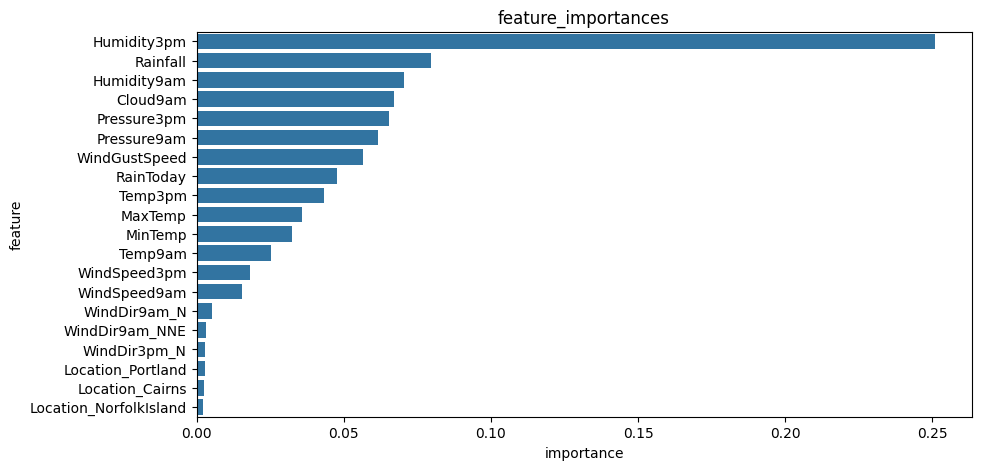

In [110]:
# Задание 4.12
# Как мы говорили в предыдущем юните, благодаря случайному лесу можно узнать, какие признаки оказывают большее влияние на целевую переменную по сравнению с другими
# Оцените значимость признаков
import matplotlib.pyplot as plt
import seaborn as sns

fi_df = pd.DataFrame({'importance': gs_rfc_best.feature_importances_,
                      'feature': gs_rfc_best.feature_names_in_})
fig = plt.figure(figsize=(10, 5))
sns.barplot(fi_df.sort_values(by='importance', ascending=False).head(20),
            y='feature',
            x='importance')
plt.title('feature_importances')
plt.show()

---

### 6. Бустинг. Практика

* `Gender` — пол пассажира (женский, мужской);
* `Customer` Type — тип клиента (постоянный/непостоянный клиент);
* `Age` — возраст клиента;
* `Type` of Travel — цель перелета (личная/деловая поездка);
* `Class` — туристический класс пассажира (Business, Eco, Eco Plus);
* `Flight distance` — расстояние полета;
* `Inflight wifi service` — уровень удовлетворённости Wi-Fi (0 — не применимо, 1–5);
* `Departure/Arrival time convenient` — уровень удовлетворённости временем отправления и прибытия;
* `Ease of Online booking` — уровень удовлетворённости онлайн-бронированием;
* `Gate location` — уровень удовлетворённости расположением выхода на посадку;
* `Food and drink` — уровень удовлетворённости едой и напитками;
* `Online boarding` — уровень удовлетворённости онлайн-регистрацией;
* `Seat comfort` — уровень удовлетворённости комфортом сидений;
* `Inflight entertainment` — уровень удовлетворённости развлечениями на борту;
* `On-board service` — уровень удовлетворённости сервисом на борту;
* `Leg room service` — уровень удовлетворённости местом для ног;
* `Baggage handling` — уровень удовлетворённости обработкой багажа;
* `Check-in service` — уровень удовлетворённости услугами регистрации;
* `Inflight service` — уровень удовлетворённости обслуживанием во время полёта;
* `Cleanliness` — уровень удовлетворённости чистотой;
* `Departure Delay in Minutes` — задержка при отправлении (в минутах);
* `Arrival Delay in Minutes` — задержка при прибытии (в минутах);
* `Satisfaction` — удовлетворённость авиакомпанией — целевая переменная (satisfaction/neutral/dissatisfaction).

In [111]:
import catboost as cb
import xgboost as xgb

airpass_df = pd.read_csv('data/AirPass.csv', index_col=0)
airpass_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [112]:
airpass_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [113]:
# Задание 6.1
# Для начала сделаем небольшую предобработку данных. Сколько всего в данных пропущенных значений?
airpass_df.isnull().sum().sum()

310

In [114]:
# Задание 6.2
# Теперь давайте избавимся от найденных пропусков. Заполните их все медианными значениями
airpass_df = airpass_df.fillna(airpass_df['Arrival Delay in Minutes'].median())

# После этого вычислите среднее арифметическое для признака, отражающего задержку при прибытии в минутах. Ответ округлите до двух знаков после точки-разделителя
round(airpass_df['Arrival Delay in Minutes'].mean(), 2)

15.13

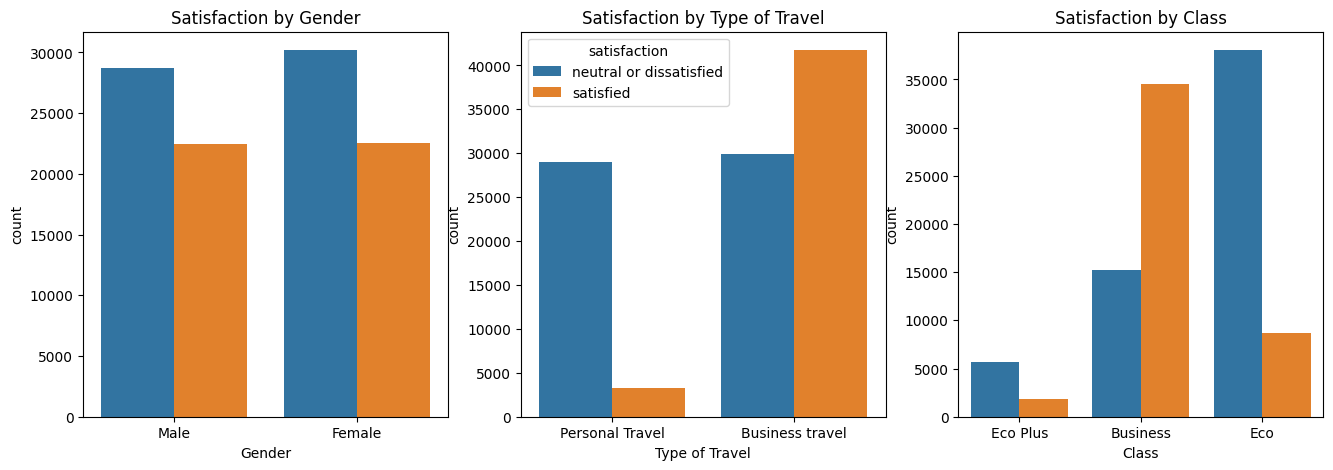

Class
Business    0.694251
Eco         0.186138
Eco Plus    0.246064
Name: proportion, dtype: float64

In [115]:
# Задание 6.3
# Проведём небольшой разведывательный анализ. Посмотрим, в каких категориях пассажиров превалировали удовлетворённые полетом клиенты
# Совет: для ответов на вопросы попробуйте использовать как вычисления, так и визуализации
# 1. Сравните удовлетворённость полётом мужчин и женщин. Выберите верное утверждение:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
sns.countplot(airpass_df, x='Gender', hue='satisfaction', ax=ax[0], legend=False)
ax[0].set_title('Satisfaction by Gender')


# 2. Теперь сравним категории пассажиров в зависимости от их цели поездки. Выберите все верные утверждения:
sns.countplot(airpass_df, x='Type of Travel', hue='satisfaction', ax=ax[1])
ax[1].set_title('Satisfaction by Type of Travel')

# 3. В каком туристическом классе наибольший процент довольных клиентов?
sns.countplot(airpass_df, x='Class', hue='satisfaction', ax=ax[2], legend=False)
ax[2].set_title('Satisfaction by Class')
handles, labels = ax[2].get_legend_handles_labels()
plt.show()

airpass_df.groupby(['Class'])['satisfaction'].value_counts(normalize=True).loc[:, 'satisfied']

In [116]:
# Перекодируем часть бинарных признаков, чтобы использовать их при обучении:
airpass_df['satisfaction'] = airpass_df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
airpass_df['Customer Type'] = airpass_df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
airpass_df['Type of Travel'] = airpass_df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})
airpass_df['Gender'] = airpass_df['Gender'].map({'Male': 0, 'Female': 1})

In [117]:
# Задание 6.4
# Для остальных категориальных признаков создайте dummy-переменные. Сделайте это с помощью функции get_dummies() из библиотеки Pandas, параметры не меняйте
airpass_df = pd.get_dummies(airpass_df)

# Сколько теперь признаков в данных (включая целевую переменную)?
airpass_df.shape[1]

26

In [118]:
# Задание 6.5
# Разбейте данные на обучающую и тестовую выборки в соотношении 80/20, параметр random_state = 26
X = airpass_df.drop('satisfaction', axis=1)
y = airpass_df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

# Сколько наблюдений попало в тестовую выборку?
y_test.shape

(20781,)

In [119]:
# Задание 6.6
# Теперь нам необходимо реализовать масштабирование данных
# Для этого обучите на обучающей выборке метод StandardScaler() и с помощью него преобразуйте и обучающую, и тестовую выборки
# Не забудьте, что целевую переменную обрабатывать не нужно
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Примечание. Отметим, что если бы дальше мы работали только с деревьями, масштабирование бы не требовалось
# Однако мы реализуем его, чтобы можно было обучать и другие модели и сравнивать полученные результаты
# В качестве ответа введите самое первое значение из матрицы преобразованных признаков тестовой выборки. Округлите значение до двух знаков после точки-разделителя
round(X_test[0, 0], 2)

0.94

In [120]:
# Задание 6.7
# Перейдём к обучению моделей. В качестве первой модели возьмём самую простую — логистическую регрессию
# Мы делаем это для того, чтобы потом сравнивать с ней полученные результаты: так вы сможете выяснить, насколько ансамбли смогут улучшить точность прогноза
# Обучите логистическую регрессию с параметрами по умолчанию на наших данных
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя
y_train_pred_log_reg = log_reg.predict(X_train)
y_test_pred_log_reg = log_reg.predict(X_test)
print(f'Train f1-score: {metrics.f1_score(y_train, y_train_pred_log_reg):.3f}')
print(f'Test f1-score: {metrics.f1_score(y_test, y_test_pred_log_reg):.3f}')

Train f1-score: 0.854
Test f1-score: 0.855


In [121]:
# Задание 6.8
# Теперь перейдём к бустингу. Начнём с обучения первой модели — AdaBoost. В качестве базовой модели для неё возьмите решающее дерево с параметром random_state = 26
# Обучите AdaBoost, зафиксировав random_state со значением 26 и задав темп обучения 0.01
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=26),
                               random_state=26,
                               learning_rate=0.01,
                               algorithm='SAMME')
ada_boost.fit(X_train, y_train)

# В качестве ответа введите значение метрики f1_score. Ответ округлите до трёх знаков после точки-разделителя
y_train_pred_ada_boost = ada_boost.predict(X_train)
y_test_pred_ada_boost = ada_boost.predict(X_test)
print(f'Train f1-score: {metrics.f1_score(y_train, y_train_pred_ada_boost):.3f}')
print(f'Test f1-score: {metrics.f1_score(y_test, y_test_pred_ada_boost):.3f}')

Train f1-score: 1.000
Test f1-score: 0.940


In [122]:
# Задание 6.9
# Перейдем к следующему алгоритму — градиентному бустингу
# Будем настраивать количество деревьев и темп обучения, делая перебор по следующей сетке:
params = {"n_estimators":2**np.arange(8), "learning_rate":0.1**np.arange(3)}

# Используйте для поиска оптимальных параметров GridSearchCV, а для ускорения работы алгоритма задайте параметр кросс-валидации, равный 3
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gs_gbc = GridSearchCV(estimator=gbc,
                      param_grid=params,
                      cv=3)
gs_gbc.fit(X_train, y_train)

# Какое наибольшее значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя
# Примечание. Необходимо указать лучший результат в методе GridSearchCV на тренировочных данных
y_train_pred_gs_gbc = gs_gbc.predict(X_train)
y_test_pred_gs_gbc = gs_gbc.predict(X_test)
print(f'Train f1-score: {metrics.f1_score(y_train, y_train_pred_gs_gbc):.3f}')
print(f'Test f1-score: {metrics.f1_score(y_test, y_test_pred_gs_gbc):.3f}')
print(f'Grid Search best score: {gs_gbc.best_score_}')

Train f1-score: 0.961
Test f1-score: 0.951
Grid Search best score: 0.9563538398220649


In [123]:
# Задание 6.10
# Обучите алгоритм XGBoost. Так как он достаточно мощный «из коробки», определите его с параметрами по умолчанию, только задайте random_state = 26
# Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя
# Подсказка. Для того чтобы обучить алгоритм XGBoost для решения задачи классификации, вам понадобится XGBClassifier из библиотеки xgboost, установленной ранее
# Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии
from xgboost import XGBClassifier

xgbc = XGBClassifier(random_state=26)
xgbc.fit(X_train, y_train)
y_train_pred_xgbc = xgbc.predict(X_train)
y_test_pred_xgbc = xgbc.predict(X_test)
print(f'Train f1-score: {metrics.f1_score(y_train, y_train_pred_xgbc):.3f}')
print(f'Test f1-score: {metrics.f1_score(y_test, y_test_pred_xgbc):.3f}')

Train f1-score: 0.976
Test f1-score: 0.957


In [124]:
# Задание 6.11
# Обучите алгоритм CatBoost. Как и XGBoost, будем обучать его с настройками по умолчанию и заданным random_state = 26
# Какое значение метрики f1_score получилось? Ответ округлите до трёх знаков после точки-разделителя
# Подсказка. Для того чтобы обучить алгоритм CatBoost, вам понадобится CatBoostClassifier() из библиотеки catboost, установленной ранее
# Вся дальнейшая последовательность действий (обучение модели, предсказание, оценка качества) идентична другим алгоритмам, например логистической регрессии
from catboost import CatBoostClassifier

catboost = CatBoostClassifier(random_state=26)
catboost.fit(X_train, y_train)
y_train_pred_catboost = catboost.predict(X_train)
y_test_pred_catboost = catboost.predict(X_test)
print(f'\nTrain f1-score: {metrics.f1_score(y_train, y_train_pred_catboost):.3f}')
print(f'Test f1-score: {metrics.f1_score(y_test, y_test_pred_catboost):.3f}')

Learning rate set to 0.068023
0:	learn: 0.6018138	total: 14.5ms	remaining: 14.5s
1:	learn: 0.5020760	total: 28.1ms	remaining: 14s
2:	learn: 0.4472472	total: 41.1ms	remaining: 13.7s
3:	learn: 0.4028682	total: 54.4ms	remaining: 13.6s
4:	learn: 0.3674730	total: 67.7ms	remaining: 13.5s
5:	learn: 0.3397846	total: 81.5ms	remaining: 13.5s
6:	learn: 0.3121210	total: 94.9ms	remaining: 13.5s
7:	learn: 0.2917499	total: 108ms	remaining: 13.4s
8:	learn: 0.2749040	total: 122ms	remaining: 13.4s
9:	learn: 0.2575190	total: 136ms	remaining: 13.5s
10:	learn: 0.2473691	total: 150ms	remaining: 13.4s
11:	learn: 0.2377531	total: 163ms	remaining: 13.4s
12:	learn: 0.2279311	total: 176ms	remaining: 13.4s
13:	learn: 0.2212512	total: 190ms	remaining: 13.4s
14:	learn: 0.2100358	total: 204ms	remaining: 13.4s
15:	learn: 0.2025732	total: 218ms	remaining: 13.4s
16:	learn: 0.1942301	total: 233ms	remaining: 13.5s
17:	learn: 0.1877938	total: 247ms	remaining: 13.4s
18:	learn: 0.1832380	total: 260ms	remaining: 13.4s
19:	le

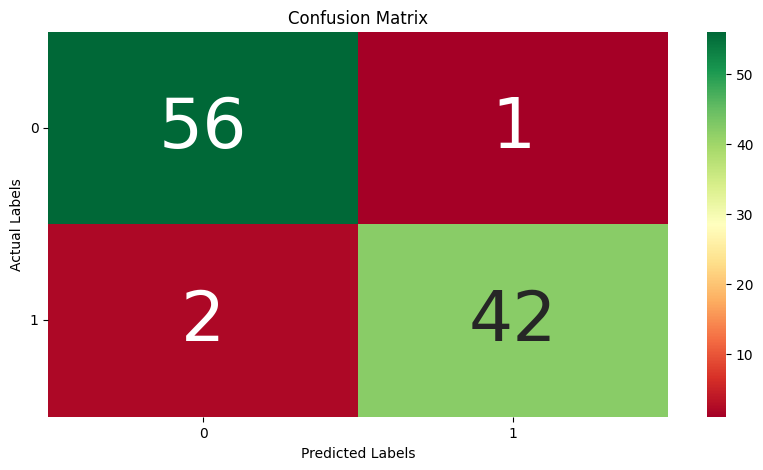

In [125]:
# Задание 6.12
# Выведите матрицу ошибок для алгоритма, который получил наилучшие показатели качества модели на обучающей выборке (будем считать, что оцениваем по f1_score)
# Значения в матрице ошибок переведите в проценты от общего числа наблюдений в обучающей выборке и округлите до целых
# Подсказка. Для того чтобы построить матрицу ошибок в CatBoost, необходимо использовать следующий шаблон:
# get_confusion_matrix(модель, Pool(признаки обучающей выборки, целевая переменная обучающей выборки))
from catboost import Pool
from catboost.utils import get_confusion_matrix

cm = get_confusion_matrix(catboost, Pool(X_train, y_train))
cmr = np.round(cm / cm.sum() * 100)

fig, ax = plt.subplots(figsize=(10, 5))
fig = sns.heatmap(cmr, cmap='RdYlGn', annot=True, annot_kws={"size": 50})
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
plt.yticks(rotation=0) 
plt.show()

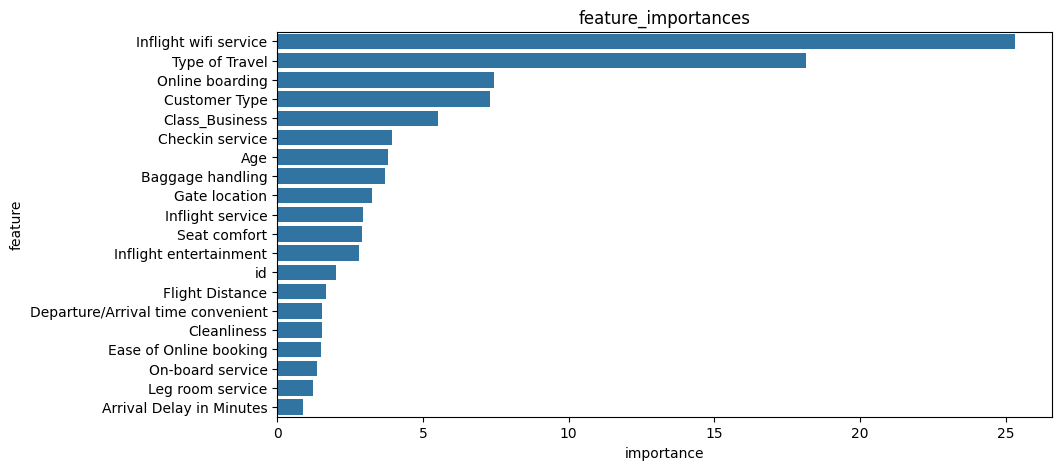

In [126]:
# Задание 6.13
# Оцените важность признаков для модели из предыдущего задания
fi_df = pd.DataFrame({'importance': catboost.feature_importances_,
                      'feature': X.columns})
fig = plt.figure(figsize=(10, 5))
sns.barplot(fi_df.sort_values(by='importance', ascending=False).head(20),
            y='feature',
            x='importance')
plt.title('feature_importances')
plt.show()

---

### 7. Стекинг

In [127]:
frogs_df = pd.read_csv('data/Frogs_MFCCs.csv')
frogs_df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [128]:
frogs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [133]:
# Разделите выборку на обучающую и тестовую в соотношении 80/20, параметр random_state = 31
X = frogs_df.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
y = frogs_df['Family']
y = y.apply(lambda x: 1 if x=='Dendrobatidae' else 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [134]:
# Задание 7.5
# Для начала обучите на наших данных случайный лес с десятью решающими деревьями. Воспользуйтесь параметрами по умолчанию
# В качестве значения random_state возьмите число 42
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

# Оцените значение f1-меры и введите его в качестве ответа, предварительно округлив до двух знаков после точки-разделителя
y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)
print(f'Train f1-score: {metrics.f1_score(y_train, y_train_pred_rfc):.2f}')
print(f'Test f1-score: {metrics.f1_score(y_test, y_test_pred_rfc):.2f}')

Train f1-score: 1.00
Test f1-score: 0.97


In [146]:
# Задание 7.6
# Теперь попробуем улучшить качество нашего предсказания за счёт использования стекинга
# В качестве базовых моделей выберите следующие:
# случайный лес с десятью деревьями, random_state = 31;
rfc = RandomForestClassifier(n_estimators=10, random_state=31)

# KNN, количество соседей = 11;
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11)

# наивный байесовский классификатор с параметрами по умолчанию, в качестве метода возьмите GaussianNB()
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

# В качестве метамодели выберите логистическую регрессию
lgr = LogisticRegression()

# Обучите модели и сделайте предсказание целевой метки для тестового набора данных
from sklearn.ensemble import StackingClassifier

estimators = [('rfc', rfc),
              ('knn', knn),
              ('gnb', gnb)]
meta = StackingClassifier(estimators=estimators, final_estimator=lgr)
meta.fit(X_train, y_train)
y_test_pred_meta = meta.predict(X_test)

# Рассчитайте f1-меру для тестового набора данных и введите её в качестве ответа, предварительно округлив до двух знаков после точки-разделителя
print(f'Test f1-score: {metrics.f1_score(y_test,y_test_pred_meta):.2f}')

Test f1-score: 0.99
